In [ ]:
pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
!pip install kaggle torch torchvision transformers datasets pyttsx3 sacrebleu  rouge-score matplotlib  bitsandbytes


In [ ]:
from google.colab import files
files.upload()

import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


Saving kaggle.json to kaggle.json


In [ ]:
import os

# Ensure the kaggle.json file is in the correct directory
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'  # Adjust path if necessary

# Download the dataset using Kaggle API
!kaggle datasets download -d adityajn105/flickr8k


Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0


In [ ]:
!unzip flickr8k.zip -d ./flickr8k


Streaming output truncated to the last 5000 lines.
  inflating: ./flickr8k/Images/2844846111_8c1cbfc75d.jpg  
  inflating: ./flickr8k/Images/2844963839_ff09cdb81f.jpg  
  inflating: ./flickr8k/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: ./flickr8k/Images/2845691057_d4ab89d889.jpg  
  inflating: ./flickr8k/Images/2845845721_d0bc113ff7.jpg  
  inflating: ./flickr8k/Images/2846037553_1a1de50709.jpg  
  inflating: ./flickr8k/Images/2846785268_904c5fcf9f.jpg  
  inflating: ./flickr8k/Images/2846843520_b0e6211478.jpg  
  inflating: ./flickr8k/Images/2847514745_9a35493023.jpg  
  inflating: ./flickr8k/Images/2847615962_c330bded6e.jpg  
  inflating: ./flickr8k/Images/2847859796_4d9cb0d31f.jpg  
  inflating: ./flickr8k/Images/2848266893_9693c66275.jpg  
  inflating: ./flickr8k/Images/2848571082_26454cb981.jpg  
  inflating: ./flickr8k/Images/2848895544_6d06210e9d.jpg  
  inflating: ./flickr8k/Images/2848977044_446a31d86e.jpg  
  inflating: ./flickr8k/Images/2849194983_2968c72832.jpg  
  inf

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0


In [ ]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import BlipProcessor
from PIL import Image
import os

# Load full captions file (assumed format: image, caption)
captions_df = pd.read_csv('flickr8k/captions.txt')
captions_df = captions_df.dropna().reset_index(drop=True)

# Select 4000 unique image names
unique_images = captions_df['image'].unique()[:4000]

# Filter for those 4000 images
filtered_df = captions_df[captions_df['image'].isin(unique_images)]

# Keep only the first 4 captions per image

print(filtered_df)




                           image  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
19995  3094278545_febac56382.jpg   
19996  3094278545_febac56382.jpg   
19997  3094278545_febac56382.jpg   
19998  3094278545_febac56382.jpg   
19999  3094278545_febac56382.jpg   

                                                 caption  
0      A child in a pink dress is climbing up a set o...  
1                  A girl going into a wooden building .  
2       A little girl climbing into a wooden playhouse .  
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
19995                A bride folds her arms at a beach .  
19996           A girl wears a fancy dress and a tiara .  
19997  A pretty girl wearing a white

In [ ]:
captions_df["caption"]

,caption
0,A child in a pink dress is climbing up a set o...
1,A girl going into a wooden building .
2,A little girl climbing into a wooden playhouse .
3,A little girl climbing the stairs to her playh...
4,A little girl in a pink dress going into a woo...
...,...
40450,A man in a pink shirt climbs a rock face
40451,A man is rock climbing high in the air .
40452,A person in a red shirt climbing up a rock fac...
40453,A rock climber in a red shirt .


In [ ]:
captions_df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [ ]:
captions_df = captions_df[:8000]
captions_df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
7995,2350400382_ced2b6c91e.jpg,A black dog caught in mid-jump catching a toy ...
7996,2350400382_ced2b6c91e.jpg,A black dog flies through the air while holdin...
7997,2350400382_ced2b6c91e.jpg,A black dog jumps in the air to catch a toy .
7998,2350400382_ced2b6c91e.jpg,A black dog running with a black and white toy...


In [ ]:
from transformers import AutoProcessor
from PIL import Image

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")

class Flickr8kDataset(Dataset):
    def __init__(self, dataframe, image_dir, processor):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.processor = processor

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_path = os.path.join(self.image_dir, row["image"])
        caption = row["caption"]

        # Load image
        image = Image.open(image_path).convert('RGB')

        # Process image
        encoding = self.processor(images=image, return_tensors="pt")
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        encoding["text"] = caption

        return encoding

def collate_fn(batch):
    processed_batch = {}
    for key in batch[0].keys():
        if key != "text":
            processed_batch[key] = torch.stack([example[key] for example in batch])
        else:
            text_inputs = processor.tokenizer(
                [example["text"] for example in batch], padding=True, return_tensors="pt"
            )
            processed_batch["input_ids"] = text_inputs["input_ids"]
            processed_batch["attention_mask"] = text_inputs["attention_mask"]
    return processed_batch


Found existing installation: bitsandbytes 0.45.5
Uninstalling bitsandbytes-0.45.5:
  Successfully uninstalled bitsandbytes-0.45.5
  Using cached bitsandbytes-0.45.5-py3-none-manylinux_2_24_x86_64.whl.metadata (5.0 kB)
Using cached bitsandbytes-0.45.5-py3-none-manylinux_2_24_x86_64.whl (76.1 MB)


In [ ]:
from transformers import Blip2ForConditionalGeneration, BitsAndBytesConfig
from peft import LoraConfig, get_peft_model

# Create the quantization config
bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,
    llm_int8_threshold=6.0,
    llm_int8_skip_modules=None
)

# Load the model with the new quantization method
model = Blip2ForConditionalGeneration.from_pretrained(
    "ybelkada/blip2-opt-2.7b-fp16-sharded",
    device_map="auto",
    quantization_config=bnb_config
)

# Apply LoRA
config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    target_modules=["q_proj", "k_proj"]
)
model = get_peft_model(model, config)
model.print_trainable_parameters()


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

trainable params: 5,242,880 || all params: 3,749,922,816 || trainable%: 0.1398


In [ ]:
import torch
# Load dataset
train_dataset = Flickr8kDataset(captions_df, '/content/flickr8k/Images/', processor)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=3, collate_fn=collate_fn)

# Set up optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.train()

# Training loop
for epoch in range(2):  # Use small epochs for testing, increase later
    print(f"Epoch: {epoch}")
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device, torch.float16)

        outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=input_ids)
        loss = outputs.loss

        print(f"Batch {idx} Loss: {loss.item():.4f}")

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


Epoch: 0
Batch 0 Loss: 4.6289
Batch 1 Loss: 5.9180
Batch 2 Loss: 3.6680
Batch 3 Loss: 5.4961
Batch 4 Loss: 4.8242
Batch 5 Loss: 5.3711
Batch 6 Loss: 4.9414
Batch 7 Loss: 3.9805
Batch 8 Loss: 2.9668
Batch 9 Loss: 3.3477
Batch 10 Loss: 2.3613
Batch 11 Loss: 2.4375
Batch 12 Loss: 2.2031
Batch 13 Loss: 3.1094
Batch 14 Loss: 2.9961
Batch 15 Loss: 3.1699
Batch 16 Loss: 2.9395
Batch 17 Loss: 3.1914
Batch 18 Loss: 2.5605
Batch 19 Loss: 2.6602
Batch 20 Loss: 2.4297
Batch 21 Loss: 2.9727
Batch 22 Loss: 2.1348
Batch 23 Loss: 2.6602
Batch 24 Loss: 2.2578
Batch 25 Loss: 2.2969
Batch 26 Loss: 2.2734
Batch 27 Loss: 2.5840
Batch 28 Loss: 2.2109
Batch 29 Loss: 2.1133
Batch 30 Loss: 2.4863
Batch 31 Loss: 2.0801
Batch 32 Loss: 2.6816
Batch 33 Loss: 2.7676
Batch 34 Loss: 2.1641
Batch 35 Loss: 1.5391
Batch 36 Loss: 2.2461
Batch 37 Loss: 1.8887
Batch 38 Loss: 2.9980
Batch 39 Loss: 2.7754
Batch 40 Loss: 1.7676
Batch 41 Loss: 2.3809
Batch 42 Loss: 2.2656
Batch 43 Loss: 2.7930
Batch 44 Loss: 2.4004
Batch 45 Lo

In [ ]:
             # Example prediction
sample_image = Image.open('sample.jpg').convert('RGB')
inputs = processor(images=sample_image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=30)
caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print("Generated caption:", caption)


Generated caption: A cat is standing in the grass .


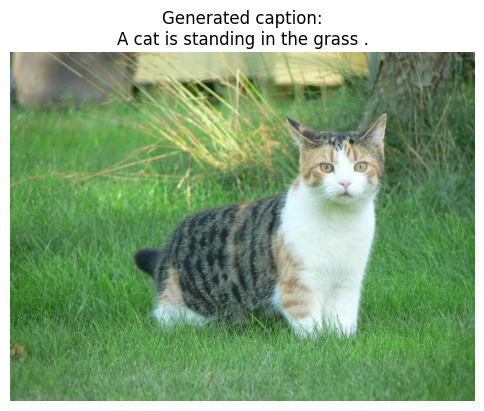

In [ ]:
import matplotlib.pyplot as plt

# Show the sample image with the generated caption
plt.figure(figsize=(6,6))
plt.imshow(sample_image)
plt.axis("off")
plt.title(f"Generated caption:\n{caption}", fontsize=12)
plt.show()


Generated caption: Two white dog and black dog play on a road .


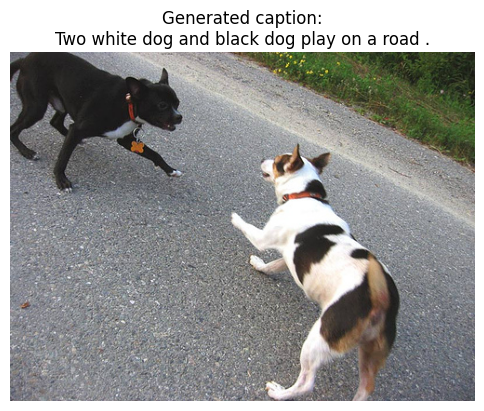

In [ ]:
# Load a sample image
sample_image = Image.open(os.path.join(IMAGES_PATH, df.iloc[5]["image"])).convert('RGB')

# Prepare inputs
inputs = processor(images=sample_image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=25)

# Decode caption
caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print("Generated caption:", caption)

# Show image with caption
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(sample_image)
plt.axis("off")
plt.title(f"Generated caption:\n{caption}", fontsize=12)
plt.show()


Generated caption: A little girl in a pink dress dress is climbing up a wooden .


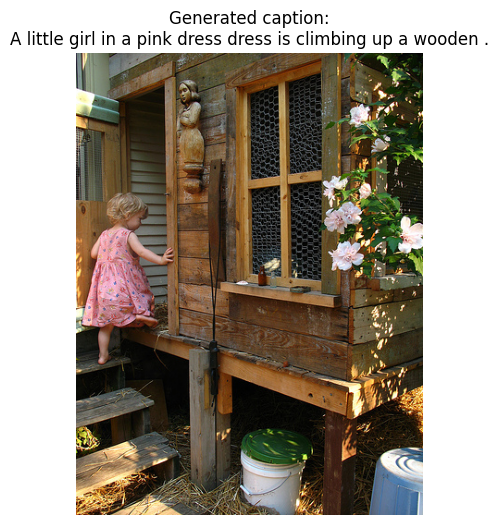

In [ ]:
# Load a sample image
sample_image = Image.open(os.path.join(IMAGES_PATH, df.iloc[0]["image"])).convert('RGB')

# Prepare inputs
inputs = processor(images=sample_image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=25)

# Decode caption
caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print("Generated caption:", caption)

# Show image with caption
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(sample_image)
plt.axis("off")
plt.title(f"Generated caption:\n{caption}", fontsize=12)
plt.show()


Generated caption: A man is sitting on a bench with a dog dog on a bench .


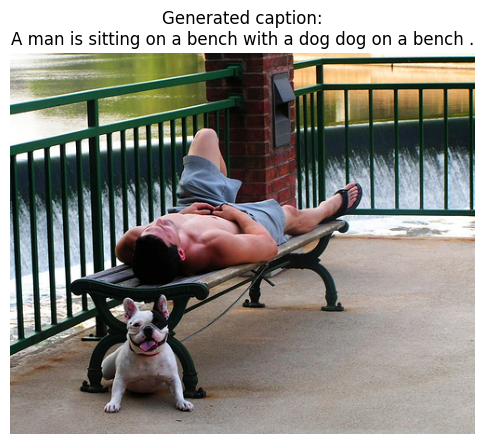

In [ ]:
# Load a sample image
sample_image = Image.open(os.path.join(IMAGES_PATH, df.iloc[15]["image"])).convert('RGB')

# Prepare inputs
inputs = processor(images=sample_image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=25)

# Decode caption
caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print("Generated caption:", caption)

# Show image with caption
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(sample_image)
plt.axis("off")
plt.title(f"Generated caption:\n{caption}", fontsize=12)
plt.show()


Generated caption: A man wearing a hat with a beer label .


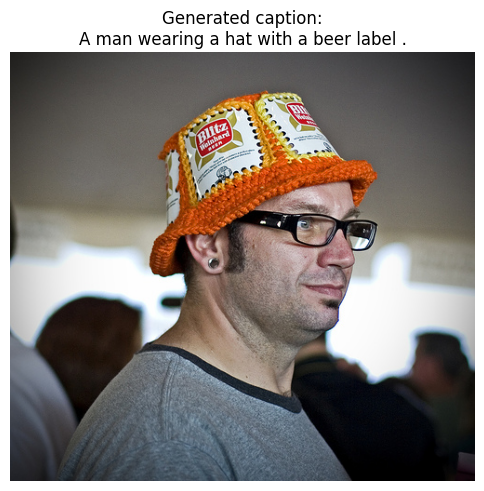

In [ ]:
# Load a sample image
sample_image = Image.open(os.path.join(IMAGES_PATH, df.iloc[20]["image"])).convert('RGB')

# Prepare inputs
inputs = processor(images=sample_image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=25)

# Decode caption
caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print("Generated caption:", caption)

# Show image with caption
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(sample_image)
plt.axis("off")
plt.title(f"Generated caption:\n{caption}", fontsize=12)
plt.show()


Generated caption: A black dog jumps on a tree branch .


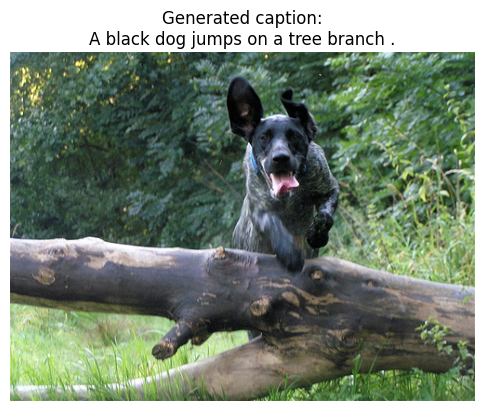

In [ ]:
# Load a sample image
sample_image = Image.open(os.path.join(IMAGES_PATH, df.iloc[49]["image"])).convert('RGB')

# Prepare inputs
inputs = processor(images=sample_image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=25)

# Decode caption
caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print("Generated caption:", caption)

# Show image with caption
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(sample_image)
plt.axis("off")
plt.title(f"Generated caption:\n{caption}", fontsize=12)
plt.show()


In [ ]:
!pip install evaluate pycocoevalcap --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 7.9 MB/s eta 0:00:00


FileNotFoundError: Couldn't find a module script at /content/cider/cider.py. Module 'cider' doesn't exist on the Hugging Face Hub either.

In [ ]:
import evaluate
from tqdm import tqdm
from PIL import Image
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer

bleu = evaluate.load("bleu")
captions_df = pd.read_csv('flickr8k/captions.txt')
captions_df = captions_df.dropna().reset_index(drop=True)
# Get subset
subset_df = captions_df[4001:4092].reset_index(drop=True)

# Collect predictions and references
predictions = []
references = {}

for idx in tqdm(range(len(subset_df))):
    row = subset_df.iloc[idx]
    image_name = row['image']

    image_path = os.path.join('/content/flickr8k/Images/', image_name)
    image = Image.open(image_path).convert('RGB')

    inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
    generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=25)
    caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    predictions.append(caption)

    if image_name not in references:
        refs = captions_df[captions_df['image'] == image_name]['caption'].tolist()
        references[image_name] = refs

# Prepare for BLEU
gt_list = [references[name] for name in subset_df["image"]]
pred_list = predictions

bleu_score = bleu.compute(predictions=pred_list, references=gt_list)
print("BLEU:", bleu_score)


100%|██████████| 91/91 [04:34<00:00,  3.02s/it]

BLEU: {'bleu': 0.08945989674827004, 'precisions': [0.511049723756906, 0.19597989949748743, 0.051991150442477874, 0.012300123001230012], 'brevity_penalty': 1.0, 'length_ratio': 1.6605504587155964, 'translation_length': 1086, 'reference_length': 654}


In [ ]:
# Prepare COCO-style input
gts = {}
res = {}

for i, img in enumerate(subset_df["image"]):
    gts[str(i)] = [{"caption": cap} for cap in references[img]]
    res[str(i)] = [{"caption": predictions[i]}]

# Tokenize
tokenizer = PTBTokenizer()
gts_tokenized = tokenizer.tokenize(gts)
res_tokenized = tokenizer.tokenize(res)

# Compute CIDEr
cider_scorer = Cider()
cider_score, _ = cider_scorer.compute_score(gts_tokenized, res_tokenized)
print("CIDEr:", cider_score)


CIDEr: 0.9293435340659406
